### Naive Bayes From Scratch
The Naive Bayes algorithm uses the probability of each classified attribute (classified here means that this particular attribute belongs to that particular class) in which there is a large number of attributes that belong to number of classes. Naive Bayes uses these probabilities of finding the attribute corresponding class to make predictions. Because we split our data into ratios, namely train set and test set, using this technique in this way is considered a 'supervised learning', i.e. a probabilistic approach for a predictive modelling.
The article in wikipedia is a nice simplified [introduction](https://en.wikipedia.org/wiki/Statistics), though you might find better sources out there.

In this tutorial, we will step by step build our Naive Bayes model from scratch where we will not use any of those popular libraries, such as 'scikit-learn'. But we will still at the end of the tutorial compare our model prediction accuracy and scoring to that one used by scikit-learn. 

#### About the data

This data represent public medical records for the Pima indians patents, obtained from [UC Irvine machine learning repository](https://archive.ics.uci.edu/ml/index.php).
The data file 'pima-indians-diabetes.data.csv' can be downloaded from this [site](https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data)
All the records are for females, describe their diabetes results (i.e. our classes for this test and labeled as '0 for negative' or '1 for positive'). These results are associated with several measurements that indicate whether or not the sample is tested as diabetes case. We consider these measurements as our categories (headers) of our dataframes, ['number of pregnancy', 'plasma concentraion', 'Diastolic blood pressure', 'Triceps skin', 'Serum Insulin', 'Weight',  'Diabetes pedigree', 'Age', 'Class'].

#### Visualizing the data

Let's start first by exploring our data, we are going to use pandas framing to bring the hidden details of our data, such as distributions, concentration and contrast of important features. This is an important steps which let us learn specific details about the collected samples and how they relate to one another. Although it is handy to visualize but not sufficient to allow us to predict. In the machine learning section, we put more details for how we can use this data to build a prediction model.

In [35]:
import os, csv, random, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [196]:
def load_data(_file, _folder):
    _dir = data_dir = os.path.join(
    os.path.dirname(os.path.realpath("__file__")), _folder)
    file_path = _dir+'/'+_file
    data = csv.reader(open(file_path, "rb"))
    dataset = list(data)
    for line in range(len(dataset)):
        dataset[line] = [float(x) for x in dataset[line]] 
        
    return _file, dataset 
    
_file, dataset = load_data('pima-indians-diabetes.csv', 'data')
print("Loaded data file '{0}' with {1} rows").format(_file, len(dataset))

Loaded data file 'pima-indians-diabetes.csv' with 769 rows


In [153]:
# # It is important to randomly shuffle the data when producing the training and test sets. 
# def split_data(dataset, split_ratio):
#     train_size = int(len(dataset)*split_ratio)
#     train_set = []
#     data = list(dataset)
#     while len(train_set) < train_size:
#         index = random.randrange(len(data))
#         train_set.append(data.pop(index))
    
#     return [train_set, data]

# # and let's test it to see if it can shuffle randomly
# # data = [1,2,3,4,5,6,7,8,9]
# # train_set, test_set = split_data(data, 0.5)
# # print len(train_set), len(test_set)
# # print train_set, test_set

In [197]:
"""let's create DatFrame using pandas. Becasue we don't have headers in this particular data file 
we just load them manually. This data has the following attributes:
Luckily all the attribute are numerical values:
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)"""

headers = ['number of pregnancy',
           'plasma concentraion',
          'Diastolic blood pressure',
          'Triceps skin',
          'Serum Insulin',
          'Weight',
          'Diabetes pedigree',
          'Age',
          'Class']

def pandas_framing(_dataset, _columns):
    panda_frame = pd.DataFrame(_dataset, columns=_columns)
    
    return panda_frame
# Lest's look at it
df = pandas_framing(dataset, headers)
print 'length of this data frame: {}'.format(len(df)), 'lines' # we double check the length
df.fillna(df.mean()) # we get red of empty/nan cells
df.head()

length of this data frame: 769 lines


,number of pregnancy,plasma concentraion,Diastolic blood pressure,Triceps skin,Serum Insulin,Weight,Diabetes pedigree,Age,Class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


### Visualizing the data
Note, class '0' here means that this person is tested negative and class '1' means testes positive.

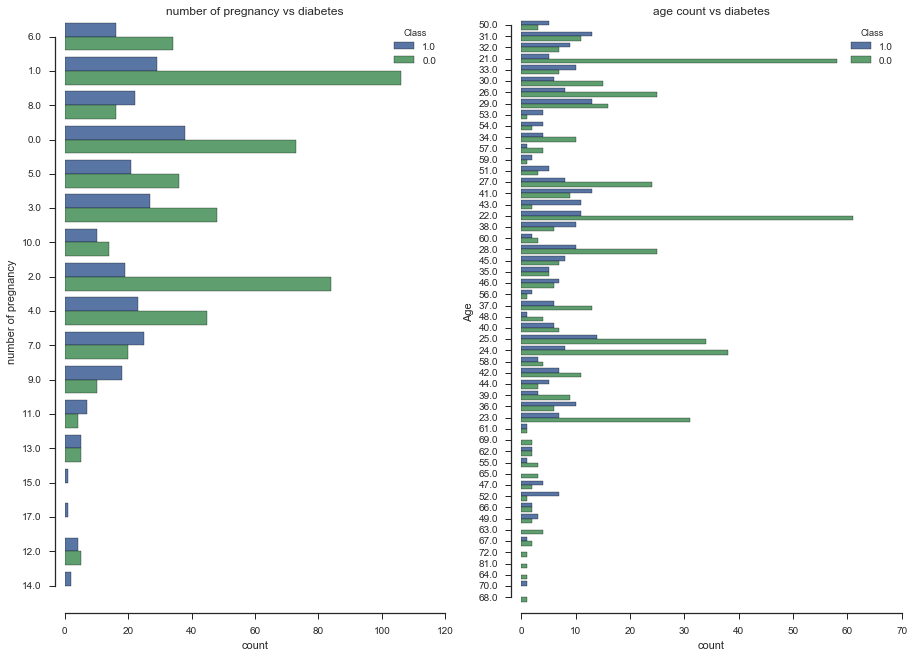

In [166]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(15.0, 23.0)

ax1 = fig.add_subplot(221); ax1.set_title('number of pregnancy vs diabetes')
sb.countplot(y='number of pregnancy',hue="Class", data=df, ax=ax1)

ax2 = fig.add_subplot(222); ax2.set_title('age count vs diabetes')
sb.countplot(y='Age',hue="Class", data=df, ax=ax2)


sb.set_style("white")
sb.set_style('ticks')
sb.despine(offset=10, trim=True)
sb.despine()

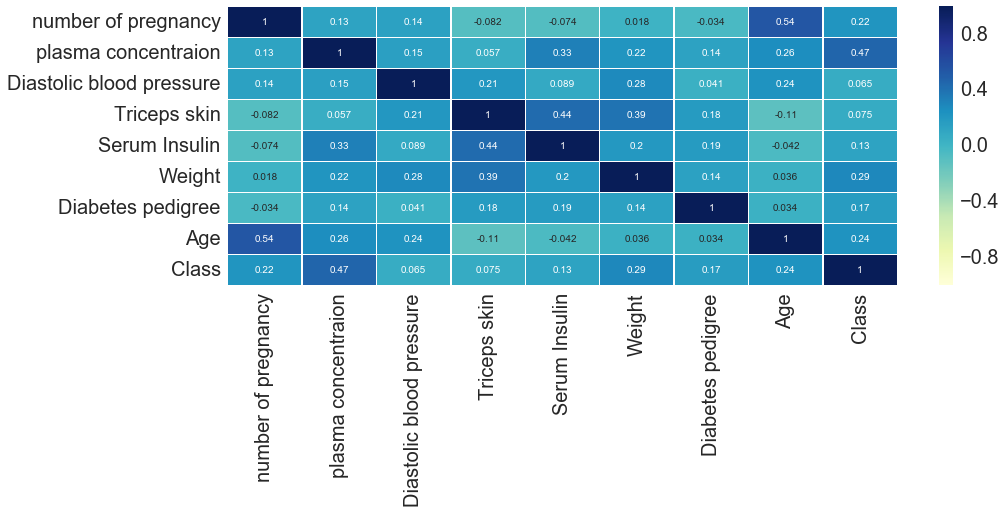

In [12]:
fig = plt.figure()
fig.set_size_inches(15.0, 5.0)
corr = df[['number of pregnancy',
           'plasma concentraion',
          'Diastolic blood pressure',
          'Triceps skin',
          'Serum Insulin',
          'Weight',
          'Diabetes pedigree',
          'Age',
          'Class']].corr()

sb.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")
sb.set(font_scale=2)

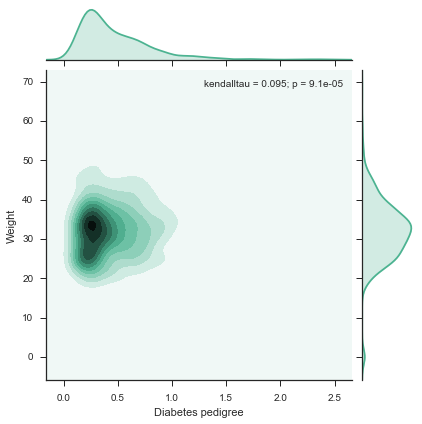

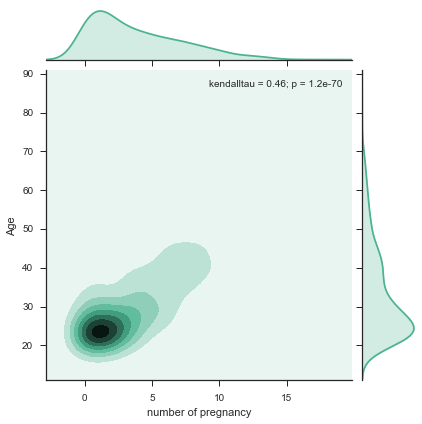

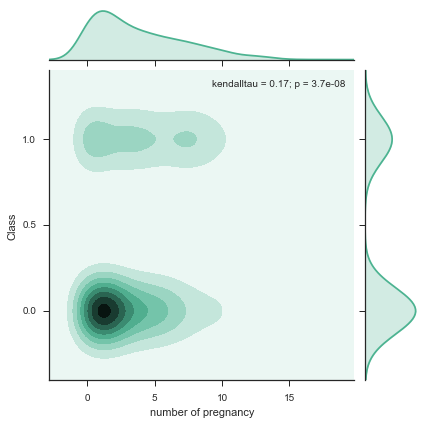

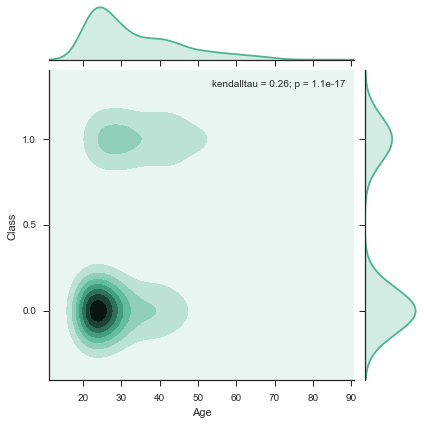

In [188]:
from scipy.stats import kendalltau

x = df['Weight']
y = df['Diabetes pedigree']
sb.jointplot(y, x, kind="kde", stat_func=kendalltau, color="#4CB391")
#sb.set(font_scale=1.5)

x = df['Age']
y = df['number of pregnancy']
sb.jointplot(y, x, kind="kde", stat_func=kendalltau, color="#4CB391")
# with sb.axes_style("white"):
#     sb.jointplot(x=x, y=y, kind="hex", color="k");
    
x = df['Class']
y = df['number of pregnancy']
sb.jointplot(y, x, kind="kde", stat_func=kendalltau, color="#4CB391")


x = df['Class']
y = df['Age']
sb.jointplot(y, x, kind="kde", stat_func=kendalltau, color="#4CB391")


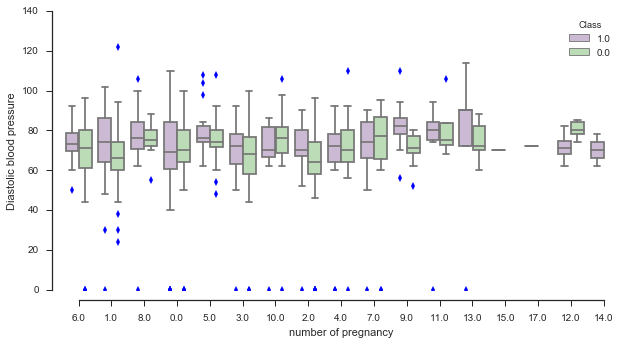

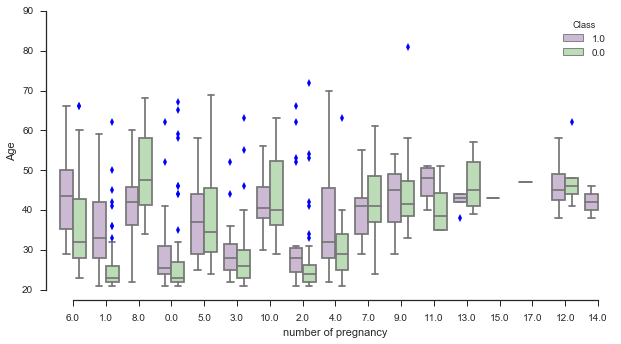

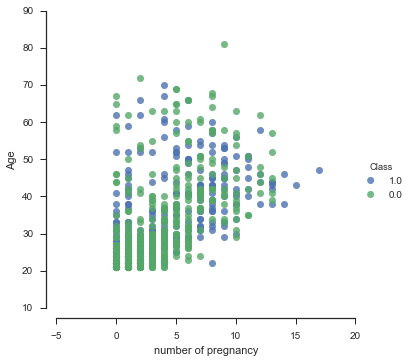

In [170]:

#------------------
fig = plt.figure()
fig.set_size_inches(10.0, 5.0)
sb.boxplot(x='number of pregnancy', y='Diastolic blood pressure', hue="Class", data=df, palette="PRGn")
sb.despine(offset=10, trim=True)

fig = plt.figure()
fig.set_size_inches(10.0, 5.0)
sb.boxplot(x='number of pregnancy', y='Age', hue="Class", data=df, palette="PRGn")
sb.despine(offset=10, trim=True)

#sb.plt.title('Total night calls per area code')

sb.lmplot('number of pregnancy', 'Age',
           data=df,
           fit_reg=False,
           hue="Class",  
           scatter_kws={"marker": "o",
                        "s": 50})
sb.despine(offset=10, trim=True)
sb.despine()

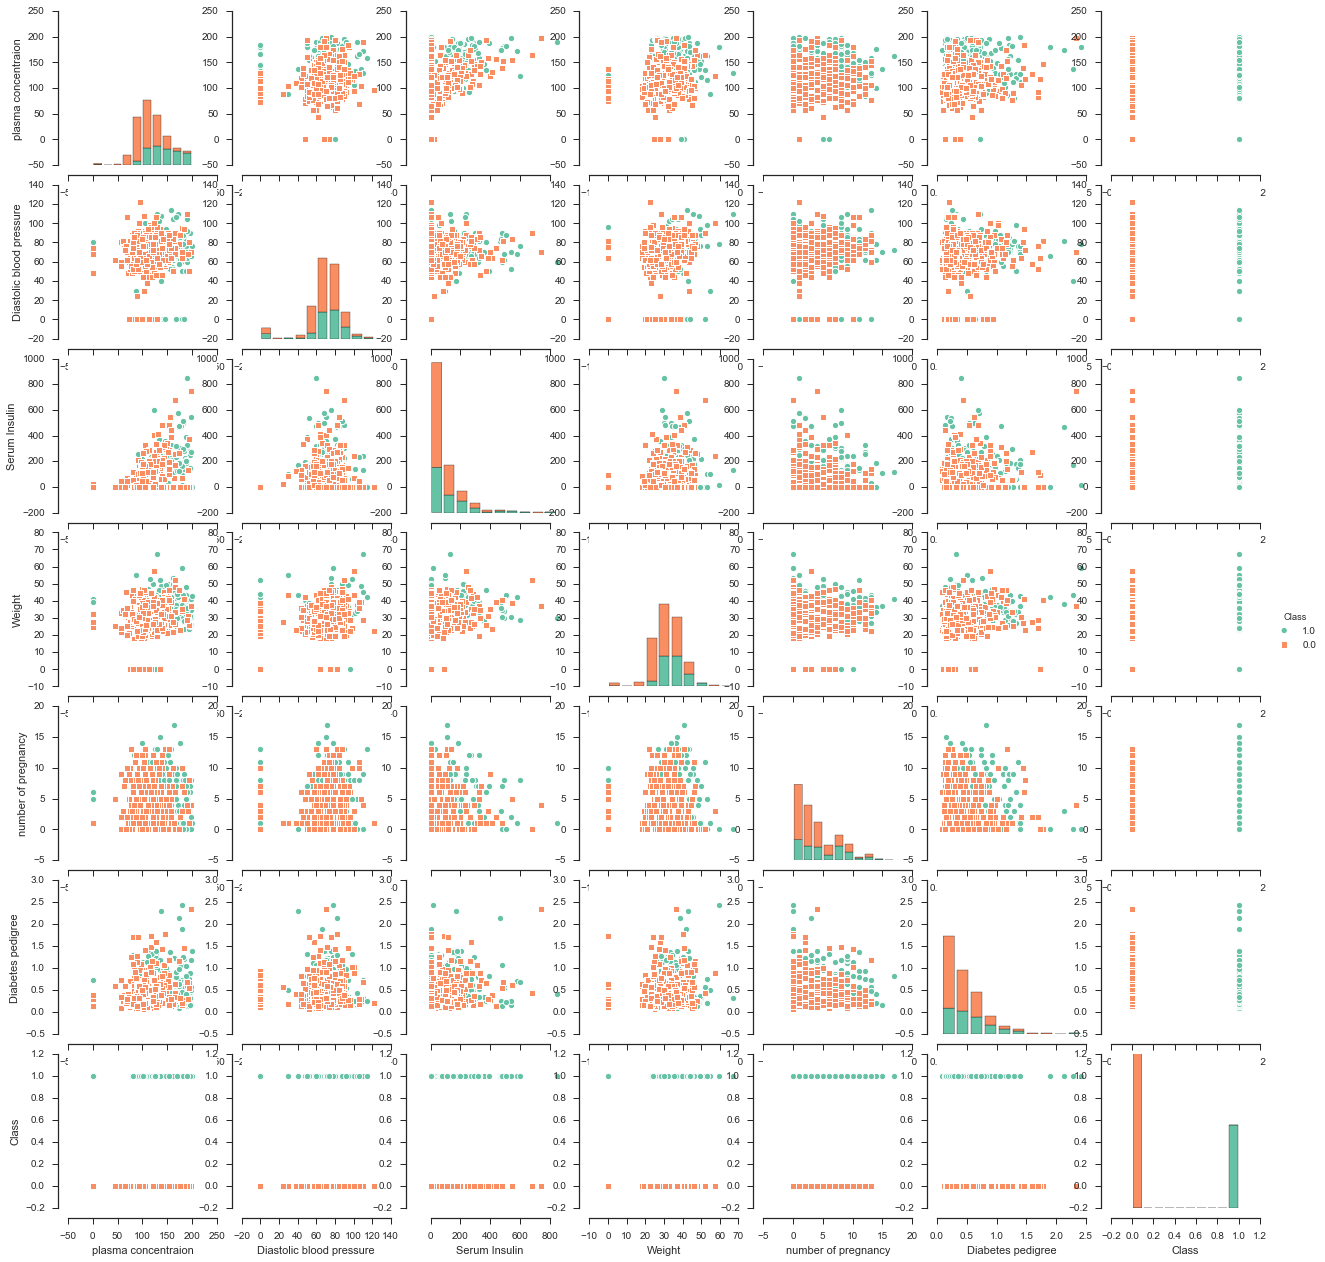

In [189]:
g = sb.PairGrid(df[[
    'plasma concentraion',
    'Diastolic blood pressure',
    'Serum Insulin',
    'Weight',
    'number of pregnancy',
    'Diabetes pedigree',
    'Class']], 
    hue="Class", palette="Set2", hue_kws={"marker": ["o", "s", "D"]})

g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(plt.hist)
g = g.add_legend()
sb.despine(offset=10, trim=True)

### Let's do the machine learning 
Please see the other fun file 'machine learning' in the same folder